### first time to run this code starts from here

In [1]:
import numpy as np
import urllib
import scipy.optimize
import random
from collections import defaultdict
import nltk
import string
from nltk.stem.porter import *
from sklearn import linear_model
import gzip
import pandas as pd
import time
import datetime as dt
import csv
import math

In [2]:
def readGz(f):
    for l in gzip.open(f):
        yield eval(l)

In [3]:
data = pd.DataFrame(readGz('australian_users_items.json.gz'))
len(data)

88310

In [4]:
## import data
user = set()
item = set()
item_list= []
user_list = []
count = 0
item_countlist = []


for l in readGz('australian_users_items.json.gz'):
    count += 1
    user_id,items,item_count = l['user_id'],l['items'],l['items_count']
    user.add(user_id)
    item_countlist.append(item_count)
    for i in items:
        item.add(i['item_id'])
        user_list.append(user_id)
        item_list.append(i['item_id'])

In [5]:
len(item)

10978

In [6]:
table = pd.DataFrame({'user' : user_list, 'item' : item_list})

In [7]:
len(user)

87626

#### scraping for all gen

In [ ]:
# # scraping

# '''import time
# from random import choice #This library helps pick a random item from a list
# import requests
# from bs4 import BeautifulSoup
# import urllib

# user_agents = [
#     'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',
#     'Opera/9.80 (X11; Linux i686; Ubuntu/14.10) Presto/2.12.388 Version/12.16',
#     'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201',
#     'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/7046A194A',
#     'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246'
# ]

# def random_headers():
#     return {'User-Agent': choice(user_agents),'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'}'''

# '''# Parse all the gen type from steam
# r = requests.get('https://store.steampowered.com/tag/browse/#global_492',headers = random_headers())
# html = r.text
# soup = BeautifulSoup(html, 'lxml')
# gen = []
# if soup.find('div',{'class': 'class="tag_browse_tags"'}) != None:
#     for i in soup.find('div',{'class': 'class="tag_browse_tags"'}).find_all('data-tagid'):
#         gen.append(i.get_text())'''

# '''# build a gen type list for later use
# gen_type = []
# for i in soup.find('div', id = 'tag_browse_global'):
#     gen_type.append(i.string)
# gen_type = [gen_type[i] for i in range(1,711,2)]'''

# '''gen_type = pd.DataFrame({'type' : gen_type})'''

# '''# Save gen_type to csv
# gen_type.to_csv('gen_type.csv', index = False, sep = ",")'''

# '''import string
# item_id_gen= defaultdict(list)

# for l in readGz('bundle_data.json.gz'):
#     for w in l['items']:
#         for i in gen_type['type']:
#             if i in w['genre']:
#                 item_id_gen[w['item_id']].append(i)'''

# '''Ori_gen_type = set()
# for l in item_id_gen.values():
#     for i in l:
#         Ori_gen_type.add(i)
# Ori_gen_type'''

In [8]:
for l in readGz('bundle_data.json.gz'):
    for w in l['items']:
        bitem.add(w['item_id'])

NameError: name 'bitem' is not defined

In [ ]:
len(bitem)

In [ ]:
bitem = set()

end

In [ ]:
# no rerun get from csv
table = table.sample(frac=1).reset_index(drop=True)
Train = table[:2576605]
Validation = table[2576605:3864907]
Test = table[3864907:]

In [ ]:
# rerun
T_userlist = Train['user']
T_itemlist = Train['item']

In [ ]:
# no rerun get from csv
import datetime as dt
time1 = dt.datetime.now()
user_item_id = defaultdict(list)
for i in range(len(Train)):
    user_item_id[Train.at[i,'user']].append(Train.at[i,'item'])
time2 = dt.datetime.now()
print("It takes ",str(time2 - time1)," to run this")     

In [ ]:
user_item_id_whole={}
for l in readGz('australian_users_items.json.gz'):
    user_id = l['user_id']
    itemtemp=[]
    user_item_id_whole[user_id]=[]
    for w in l['items']:
        itemtemp.append(w['item_id'])
        user_item_id_whole[user_id]=itemtemp

In [ ]:
# no rerun
NVal_user = []
NVal_item = []
time1 = dt.datetime.now()
for u in list(user):
    NVal_user += [u]*40
    NVal_item += random.sample([i for i in list(item) if i not in user_item_id_whole[u]],40)
    if len(NVal_user) > len(Train):
        break
Vali_len = len(Validation)
Test_len = len(Test)
NPUI = pd.DataFrame({'user' : NVal_user, 'item' : NVal_item})
NPUI = NPUI.sample(frac=1).reset_index(drop=True)
Vali_np = NPUI[:Vali_len]
Test_np = NPUI[Vali_len:]
valilabel = [1]*len(Validation) + [0] * len(Vali_np)
testlabel = [1]*len(Test) + [0] * len(Test_np)
Validationdf = pd.concat([Validation, Vali_np])
Validationdf['label'] = valilabel
Testdf = pd.concat([Test, Test_np])
Testdf['label'] = testlabel
Validationdf.to_csv("Validationset.csv",index = False, sep=",")
Testdf.to_csv("Testset.csv",index = False, sep=",")
Train.to_csv("Trainset.csv",index = False, sep=",")
time2 = dt.datetime.now()
print("It takes ",str(time2 - time1)," to run this")

In [ ]:
no_item = [i for i in item if i not in item_id_gen]

In [ ]:
len(no_item)

#### web scarping for item_id_gen

In [ ]:
# '''no_item = [i for i in item if i not in item_id_gen]'''

# '''time1 = dt.datetime.now()
# r = requests.get("https://store.steampowered.com/app/"+str(242590),headers = random_headers())
# html = r.content
# soup = BeautifulSoup(html, 'html5lib')
# gen = []
# if soup.find('div',{'class': 'details_block'}) != None:
#     gen = [i.get_text() for i in soup.find('div',{'class': 'details_block'}).find_all(href = re.compile("^https://store.steampowered.com/genre"))]
# print(gen)
# print(dt.datetime.now()-time1)'''

# '''# parse gen data from steam
# time1 = dt.datetime.now()
# count = 0

# for d in no_item:
#     try:
#         r = requests.get("https://store.steampowered.com/app/"+str(d),headers = random_headers())
#         r.encoding = 'utf-8'
#         html = r.text
#         soup = BeautifulSoup(html, 'lxml')
#         gen = []
#         if soup.find('div',{'class': 'details_block'}) != None:
#             gen = [i.string for i in soup.find('div',{'class': 'details_block'}).find_all(href = re.compile("^https://store.steampowered.com/genre"))]
#         item_id_gen[d] = gen
#         count += 1
#         if count % 10 == 0:
#             time.sleep(random.uniform(3,4))
#         elif count % 5 == 0:
#             time.sleep(random.uniform(1,2))
#     except urllib.error.URLError:
#         print(d,"has error")
#         pass
#     if count % 96 == 0:
#         print("already done %.1f"%(count*100/len(no_item)),"% of data recovery, using",(dt.datetime.now()-time1))

# print(count,"successful try, it takes:",(dt.datetime.now()-time1),"to crawl them in total. End of crawling")'''

# '''it = []
# ge = []
# for i in item_id_gen:
#     it.append(i)
#     ge.append(item_id_gen[i])

# IG = pd.DataFrame({"item":it,"gen":ge})
# IG.to_csv("IGdict5.csv",index = False, sep = ",")'''

end

### second time to run this code starts from here

In [3]:
# for the second time



# import packages

import datetime as dt
import numpy as np
import urllib
import scipy.optimize
import random
from collections import defaultdict
import nltk
import string
from nltk.stem.porter import *
from sklearn import linear_model
import gzip
import pandas as pd
import csv
from random import sample
from random import sample
import csv
import math
time0 = dt.datetime.now()
def readGz(f):
    for l in gzip.open(f):
        yield eval(l)

# generate validation set and train set

with open('Validationset.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line = 0
    Validationdf=pd.DataFrame([l for l in csv_reader])

with open('Trainset.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line = 0
    Traindf=pd.DataFrame([l for l in csv_reader])

def redf(dataframe):
    dataframe = dataframe.drop([0])
    dataframe = dataframe.reset_index(drop=True)
    if len(dataframe.columns) == 3:
        dataframe.columns = ['user','item','label']
    if len(dataframe.columns) == 2:
        dataframe.columns = ['user','item']
    return(dataframe)

Validationdf = redf(Validationdf)
Traindf = redf(Traindf)

# generate all genre

gen_type = []
with open('gen_type.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line = 0
    for row in csv_reader:
        gen_type.append(row[0])
        line += 1
    print("process %i lines" %line)


gen_type = gen_type[1:]

# generate dict item_id_gen

item_id_gen = defaultdict(list)
with open('IGdict5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line = 0
    for row in csv_reader:
        item_id_gen[row[0]] = []
        for i in gen_type:
            if i in row[1]:
                item_id_gen[row[0]].append(i)
        line += 1
    print("process %i lines" %line)

time1 = dt.datetime.now()
w = Traindf['user']
y = Traindf['item']
user_item_id = defaultdict(list)
for i in range(len(w)):
    user_item_id[w[i]].append(y[i])
time2 = dt.datetime.now()
print("It takes ",str((time2 - time1))," to generate user_item_id")

w = set(Traindf['user'])
time1 = dt.datetime.now()
user_gen_org = {}
for u in w:
    items = []
    for i in user_item_id[u]:
        items += item_id_gen[i]
    user_gen_org[u] = items
time2 = dt.datetime.now()
print("It takes "+str((time2 - time1))+" to generate user_gen_org") 

time1 = dt.datetime.now()
user_gen = {}
for u in user_gen_org:
    user_gen[u] = list(set(user_gen_org[u]))
time2 = dt.datetime.now()
print("It takes "+str((time2 - time1))+" to generate user_gen")

time1 = dt.datetime.now()
item_user_id = defaultdict(list)
for i in range(len(Traindf)):
    item_user_id[Traindf.at[i,'item']].append(Traindf.at[i,'user'])
time2 = dt.datetime.now()
print("It takes "+str((time2 - time1))+" to generate item_user_id")

time3 = dt.datetime.now()

print("It takes "+str((time3 - time0))+" to run all the things in part 2")

process 356 lines
process 12383 lines
It takes  0:01:53.253865  to generate user_item_id
It takes 0:00:01.094336 to generate user_gen_org
It takes 0:00:02.856979 to generate user_gen
It takes 0:01:27.329314 to generate item_user_id
It takes 0:03:34.742834 to run all the things in part 2


In [4]:
item_id_gen = defaultdict(list)
with open('IGdict5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line = 0
    for row in csv_reader:
        item_id_gen[row[0]] = []
        for i in gen_type:
            if i in row[1]:
                item_id_gen[row[0]].append(i)
        line += 1
    print("process %i lines" %line)

process 12383 lines


In [5]:
len(list(item_id_gen.values()))

12383

### prediction part

#### baseline model based on total portion of purchase

In [6]:
# From here is the baseline model

# generate list of 50% top popular items

totalPurchases = 0

itemcount={}
for i in user_item_id:
    for w in user_item_id[i]:
        item = w
        if item not in itemcount:
            itemcount[item] = 1
        else:
            itemcount[item] += 1
        totalPurchases += 1
        
mostPopular = [(itemcount[x], x) for x in itemcount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0
for ic, i in mostPopular:
    count += ic
    return1.add(i)
    if count > totalPurchases*0.5: break
        
# generate prediction of baseline model

Validation_user = Validationdf['user']
Validation_item = Validationdf['item']

purchase = []
for l in range(len(Validation_user)):
    u,i =Validation_user[l],Validation_item[l]
    if i in return1:
        purchase.append('1')
    else:
        purchase.append('0')
        
# accuracy of the baseline

sum(purchase == Validationdf['label'])/len(purchase)
    
# prediction_baseline = pd.DataFrame()
# prediction_baseline['user']=Validation_user
# prediction_baseline['item']=Validation_item
# prediction_baseline['label']=purchase
# prediction_baseline.to_csv("prediction_baseline.csv",index=False,sep=',')

0.738130500457191

#### Jaccard prediction

In [7]:
# defination of jaccard

def jaccard_c(cate1,cate2):
    try:
        count = 0
        for cate in cate1:
            if cate in cate2:
                count += 1
        uni = len(cate1) + len(cate2) - count
        jac = count / uni
    except:
        jac = 0
    return jac

##### Jaccard based on genre of user and item (no repeated)

In [8]:
time1 = dt.datetime.now()
jaccard_clist = []
w = Validationdf['user']
y = Validationdf['item']
for i in range(len(w)):
    try:
        usercat = user_gen[w[i]]
        itemcat = item_id_gen[y[i]]
    except:
        usercat = []
        itemcat = []
    jaccard_clist.append(jaccard_c(usercat,itemcat))
time2 = dt.datetime.now()
print(time2 - time1)

0:01:58.411638


In [9]:
acc = []
www = []
for i in Validationdf['label']:
    www.append(int(i))
    www = pd.Series(www)
    time1 = dt.datetime.now()
    for i in np.arange(0, 1, 0.01):
        purchase = list(np.array(jaccard_clist) > i)
        acc.append(sum(purchase == www)/len(purchase))
time2 = dt.datetime.now()
print((time2 - time1))
print('best i is ' + str(np.arange(0, 2, 0.1)[acc.index(max(acc))])+' and best accracy is '+str(max(acc)))

ValueError: Length of passed values is 2576604, index implies 1

##### Jaccard based on items of user and user

for the time to run prediction is really long, I randomly take 1000 random data to test the accracy

In [ ]:
# generate 0.01% random index

indexorg = np.arange(0,len(Traindf))
indexorg = list(indexorg)
indi = sample(indexorg, 1000)

In [ ]:
# generate jaccard list for the 1000 randoms

x = Validationdf['user']
y = Validationdf['item']
jaccard_clist = []
count = 0
time1 = dt.datetime.now()
for i in indi:
    user = x[i]
    item = y[i]
    jacsum = 0
    count += 1
    try:
        cat1 = user_item_id[user]
        userlist = item_user_id[item]
        for j in userlist:
            cat2 = user_item_id[j]
            jacsum += jaccard_c(cat1,cat2)
        jacsum = jacsum/len(userlist)
        jaccard_clist.append(jacsum)
    except:
        jaccard_clist.append(jacsum)
    time2 = dt.datetime.now()
print('it takes',str(time2-time1),'to generate the jaccard list')

In [ ]:
truepurchase = []
label = Validationdf['label']
acc = []

for i in indi:
    truepurchase.append(int(label[i]))
truepurchase = pd.Series(truepurchase)

time1 = dt.datetime.now()
for i in np.arange(0, 0.5, 0.001):
    purchase = list(np.array(jaccard_clist) > i)
    acc.append(sum(purchase == truepurchase)/len(purchase))
time2 = dt.datetime.now()

print('it takes',str(time2 - time1),'to generate the prediction accracy')
print('best threshold is ' + str(np.arange(0, 0.5, 0.001)[acc.index(max(acc))])+' and best accracy is '+str(max(acc)))

### cosine similarity part based on item purchase

In [10]:
def encode_item_fast(user1,user2):
    if user1 in user_item_id and user2 in user_item_id:
        itemdict1 = {i:0 for i in set(user_item_id[user1]).union(set(user_item_id[user2]))}
        itemdict2 = {i:0 for i in set(user_item_id[user1]).union(set(user_item_id[user2]))} 
        for i in user_item_id[user1]:
            if i in itemdict1:
                itemdict1[i]+=1
        for i in user_item_id[user2]:
            if i in itemdict2:
                itemdict2[i]+=1
        return(list(itemdict1.values()),list(itemdict2.values()))
    else:
        return(0,0)


def cos_sim(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

def item_sim_fast(gitem,guser):
    T_cs = 0
    l=1
    if gitem in item_user_id:
        itembuyer = item_user_id[gitem]
        if len(itembuyer) > 30:
            for b in random.sample(itembuyer,30):
                encode1,encode2 = encode_item_fast(guser,b)
                T_cs += cos_sim(encode1,encode2)
            l = 30
        elif len(itembuyer) != 0:
            for b in itembuyer:
                encode1,encode2 = encode_item_fast(guser,b)
                T_cs += cos_sim(encode1,encode2)
            l = len(itembuyer)
        else:
            l = 1
    else:
        itembuyer = [0]
    return(T_cs/l)

def accuracy(prediction,label):
    TRUE = 0
    for i in range(len(prediction)):
        if prediction[i] == label[i]:
            TRUE += 1
    return(TRUE/len(prediction))

### Calculate Cos_similarity and find optimal threshold to decide if buy or not  (Validation set)

In [11]:
Vali_index = random.sample(range(1,len(Validationdf)),10000)
Vali_exam = Validationdf.loc[Vali_index,]
Vali_exam = Vali_exam.reset_index(drop = True)
CS = []
for i in range(len(Vali_exam)):
    CS.append(item_sim_fast(Vali_exam.at[i,'item'],Vali_exam.at[i,'user']))
    if i % 1000 == 0:
        print('Process %f %% of data' %(i*100/len(Vali_exam)))
print('done')

Process 0.000000 % of data


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


Process 10.000000 % of data
Process 20.000000 % of data
Process 30.000000 % of data
Process 40.000000 % of data
Process 50.000000 % of data
Process 60.000000 % of data
Process 70.000000 % of data
Process 80.000000 % of data
Process 90.000000 % of data
done


In [12]:
label = Vali_exam['label']

Observe = {}
for threshold in np.linspace(0.068,0.072,100):
    prediction = []
    for cs in CS:
        if cs>threshold:
            prediction.append('1')
        else:
            prediction.append('0')
    Observe[threshold] = accuracy(prediction,label)
optimal = max(Observe.values())
optimal_thresh = list(Observe.keys())[list(Observe.values()).index(optimal)]
print("When using threshold of %f, we get accuracy of %f" %(optimal_thresh,optimal))

When using threshold of 0.071636, we get accuracy of 0.816800


### Use optimal threshold to predict testset

In [13]:
# Adjust threshold
with open('Testset.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line = 0
    Testdf=pd.DataFrame([l for l in csv_reader])
    
Testdf = redf(Testdf)

In [14]:
Test_index = random.sample(range(1,len(Testdf)),10000)
Test_exam = Testdf.loc[Test_index,]
Test_exam = Test_exam.reset_index(drop = True)
CS = []
for i in range(len(Test_exam)):
    CS.append(item_sim_fast(Test_exam.at[i,'item'],Test_exam.at[i,'user']))
    if i % 1000 == 0:
        print('Process %f %% of data' %(i*100/len(Test_exam)))

# change threshold
threshold = 0.069455
label = Test_exam['label']
prediction = []
for cs in CS:
    if cs>threshold:
        prediction.append('1')
    else:
        prediction.append('0')
print("When using threshold of %f, we get accuracy of %f" %(threshold,accuracy(prediction,label)))

Process 0.000000 % of data


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


Process 10.000000 % of data
Process 20.000000 % of data
Process 30.000000 % of data
Process 40.000000 % of data
Process 50.000000 % of data
Process 60.000000 % of data
Process 70.000000 % of data
Process 80.000000 % of data
Process 90.000000 % of data
When using threshold of 0.069455, we get accuracy of 0.815800


### cosine similarity part based on gen type

In [ ]:
def encode_gen_fast(user1,user2):
    if user1 in user_gen_org and user2 in user_gen_org:
        gendict1 = {i:0 for i in set(user_gen_org[user1]).union(set(user_gen_org[user2]))}
        gendict2 = {i:0 for i in set(user_gen_org[user1]).union(set(user_gen_org[user2]))}
        for g in user_gen_org[user1]:
            if g in gendict1:
                gendict1[g]+=1
        for g in user_gen_org[user2]:
            if g in gendict2:
                gendict2[g]+=1
        return(list(gendict1.values()),list(gendict2.values()))
    else:
        return(0,0)


def gen_sim_fast(gitem,guser):
    T_cs = 0
    l=1
    if gitem in item_id_gen:
        itembuyer = item_user_id[gitem]
        if len(itembuyer) > 30:
            for b in random.sample(itembuyer,30):
                encode1,encode2 = encode_gen_fast(guser,b)
                T_cs += cos_sim(encode1,encode2)
            l = 30
        elif len(itembuyer) != 0:
            for b in itembuyer:
                encode1,encode2 = encode_gen_fast(guser,b)
                T_cs += cos_sim(encode1,encode2)
            l = len(itembuyer)
    else:
        itembuyer = [0]
    return(T_cs/l)

In [ ]:
Vali_index = random.sample(range(1,len(Validationdf)),10000)
Vali_exam = Validationdf.loc[Vali_index,]
Vali_exam = Vali_exam.reset_index(drop = True)
CS = []
for i in range(len(Vali_exam)):
    CS.append(gen_sim_fast(Vali_exam.at[i,'item'],Vali_exam.at[i,'user']))
    if i % 1000 == 0:
        print('Process %f %% data' %(i*100/len(Vali_exam)))
label = Vali_exam['label']

Observe = {}
for threshold in np.linspace(0.0001,0.001,100):
    prediction = []
    for cs in CS:
        if cs>threshold:
            prediction.append('1')
        else:
            prediction.append('0')
    Observe[threshold] = accuracy(prediction,label)
optimal = max(Observe.values())
optimal_thresh = list(Observe.keys())[list(Observe.values()).index(optimal)]
print("When using threshold of %f, we get accuracy of %f" %(optimal_thresh,optimal))

### GIve a plus score on hot game

In [15]:
#Hot game

### www here should be replaced by trainset's diction which is user to item
totalPurchases = 0
itemcount=defaultdict(int)
for i in user_item_id:
    for w in user_item_id[i]:
        item = w
        itemcount[item] += 1
        totalPurchases += 1
        
mostPopular = [(itemcount[x], x) for x in itemcount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0
for ic, i in mostPopular:
    count += ic
    return1.add(i)
    if count > totalPurchases*0.5: break

In [16]:
Top_20_gen = defaultdict(int)
for ic, i in mostPopular[:20]:
    for g in item_id_gen[i]:
        Top_20_gen[g] += 1
Top_20_gen

defaultdict(int,
            {'Action': 13,
             'Indie': 5,
             'Simulation': 2,
             'Adventure': 3,
             'Casual': 1,
             'Free to Play': 4,
             'RPG': 4,
             'Massively Multiplayer': 3,
             'Multiplayer': 3})

In [17]:
Vali_index = random.sample(range(1,len(Validationdf)),1000)
Vali_exam = Validationdf.loc[Vali_index,]
Vali_exam = Vali_exam.reset_index(drop = True)

### Test in Validationset

In [18]:
for plus in np.linspace(0.0921,0.0923,10):
    CS = []
    for i in range(len(Vali_exam)):
        if Vali_exam.at[i,'item'] in return1:
            CS.append(item_sim_fast(Vali_exam.at[i,'item'],Vali_exam.at[i,'user'])+plus)
        else:
            CS.append(item_sim_fast(Vali_exam.at[i,'item'],Vali_exam.at[i,'user']))
        if i % int(len(Vali_exam)/10) == 0:
            print('Process %f %% of data' %(i*100/len(Vali_exam)))
    print('done')

    label = Vali_exam['label']
    Observe = {}
    for threshold in np.linspace(0.08,0.085,10):
        prediction = []
        for cs in CS:
            if cs>threshold:
                prediction.append('1')
            else:
                prediction.append('0')
        Observe[threshold] = accuracy(prediction,label)
    optimal = max(Observe.values())
    optimal_thresh = list(Observe.keys())[list(Observe.values()).index(optimal)]
    print("Plusing %f score for hot game, when using threshold of %f, we get accuracy of %f" %(plus, optimal_thresh,optimal))

Process 0.000000 % of data


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


Process 10.000000 % of data
Process 20.000000 % of data
Process 30.000000 % of data
Process 40.000000 % of data
Process 50.000000 % of data
Process 60.000000 % of data
Process 70.000000 % of data
Process 80.000000 % of data
Process 90.000000 % of data
done
Plusing 0.092100 score for hot game, when using threshold of 0.080000, we get accuracy of 0.876000
Process 0.000000 % of data
Process 10.000000 % of data
Process 20.000000 % of data
Process 30.000000 % of data
Process 40.000000 % of data
Process 50.000000 % of data
Process 60.000000 % of data
Process 70.000000 % of data
Process 80.000000 % of data
Process 90.000000 % of data
done
Plusing 0.092122 score for hot game, when using threshold of 0.082778, we get accuracy of 0.867000
Process 0.000000 % of data
Process 10.000000 % of data
Process 20.000000 % of data
Process 30.000000 % of data
Process 40.000000 % of data
Process 50.000000 % of data
Process 60.000000 % of data
Process 70.000000 % of data
Process 80.000000 % of data
Process 90

In [19]:
Test_index = random.sample(range(1,len(Testdf)),10000)
Test_exam = Testdf.loc[Test_index,]
Test_exam = Test_exam.reset_index(drop = True)
plus = 0.092144
CS = []
for i in range(len(Test_exam)):
    if Test_exam.at[i,'item'] in return1:
        CS.append(item_sim_fast(Test_exam.at[i,'item'],Test_exam.at[i,'user'])+plus)
    else:
        CS.append(item_sim_fast(Test_exam.at[i,'item'],Test_exam.at[i,'user']))
    if i % 1000 == 0:
        print('Process %f %% of data' %(i*100/len(Test_exam)))

# change threshold
threshold = 0.085000
label = Test_exam['label']
prediction = []
for cs in CS:
    if cs>threshold:
        prediction.append('1')
    else:
        prediction.append('0')
print("When using threshold of %f, we get accuracy of %f" %(threshold,accuracy(prediction,label)))

Process 0.000000 % of data


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


Process 10.000000 % of data
Process 20.000000 % of data
Process 30.000000 % of data
Process 40.000000 % of data
Process 50.000000 % of data
Process 60.000000 % of data
Process 70.000000 % of data
Process 80.000000 % of data
Process 90.000000 % of data
When using threshold of 0.085000, we get accuracy of 0.873100


In [49]:
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(prediction)):
    if prediction[i] == label[i]:
        if prediction[i] == '1':
            TP += 1
        elif prediction[i] == '0':
            TN += 1
    else:
        if prediction[i] == '1':
            FP += 1
        elif prediction[i] == '0':
            FN += 1

recall = TP/(TP + FN)
precision = TP/(TP + FP)
print('recall =' + str(recall) + ', precision =' + str(precision))

recall =0.885009030704395, precision =0.863689776733255


In [216]:
import matplotlib.pyplot as plt
import numpy as np
label
prediction
CS
index_l_yes = [i for i in range(len(label)) if label[i] == '1']
index_l_no = [i for i in range(len(label)) if label[i] == '0']
box1 = [CS[n] for n in index_l_no]
box2 = [CS[y] for y in index_l_yes]

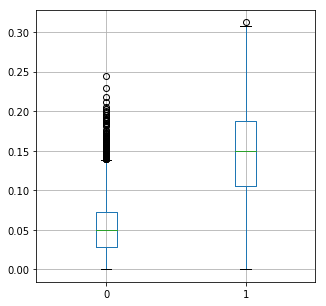

In [229]:
df = pd.DataFrame({"0":box1, "1":box2[:len(box1)]})
boxplot = df.boxplot(column=['0', '1'],figsize=(5,5))


In [227]:
[i for i in range(len(box2)) if box2[i] == 1]

[798]

In [228]:
box2.pop(798)

1.0